<a href="https://colab.research.google.com/github/NguyenthanhTung14/Nguy-nThanhT-ng/blob/main/bai_cuoi_ki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array

In [3]:
folder = '/content/drive/MyDrive/FILE_ANH_AI/Animals/'
photos, labels = list(), list()
for file in listdir(folder):
  output= 0.0
  if file.startswith('cat'):
    output= 1.0
  if file.startswith('cow'):
    output= 2.0
  if file.startswith('dog'):
    output= 3.0
  if file.startswith('duck'):
    output= 4.0
  if file.startswith('elephant'):
    output= 5.0
  if file.startswith('horse'):
    output= 6.0
  if file.startswith('monkey'):
    output= 7.0
  if file.startswith('rabbit'):
    output= 8.0
  if file.startswith('sheep'):
    output= 9.0
  if file.startswith('snake'):
    output= 10.0              
  photo = load_img(folder + file, target_size= (40,40))
  photo= img_to_array(photo)

  photos.append(photo)
  labels.append(output)

In [4]:
photos= asarray(photos)
labels= asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/npy_Data/animals_photos.npy', photos)
save('/content/drive/MyDrive/npy_Data/animals_labels.npy', labels)

(1008, 40, 40, 3) (1008,)


In [5]:
# Split data into train & test
split_index = int(0.05 * len(photos))
test_x, test_y = photos[:split_index], labels[:split_index]
train_x, train_y = photos[split_index:], labels[split_index:]

In [6]:
print(test_x.shape, train_x.shape)

(50, 40, 40, 3) (958, 40, 40, 3)


In [7]:
train_x = train_x.reshape((958, 40, 40, 3)) #sửa lại cho giống như ma trận hàng trêntrên
train_x = train_x.astype('float32')/255

test_x = test_x.reshape((50, 40, 40, 3))
test_x = test_x.astype('float32')/255

In [8]:
from keras.utils import to_categorical
train_y = to_categorical(train_y,11) #bao nhiu output thì sửa lạilại
test_y = to_categorical(test_y,11)

In [9]:
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,Input
from keras.optimizers import Adam
from keras import losses
loss = losses
batch_size = 64
epochs = 40
classes = 11 # bao nhiêu output thì sửa lại 

In [10]:
from keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', input_shape = (40, 40, 3), padding= 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(256, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(512, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(1024, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

In [11]:
#Đưa vào ANN, bộ ANN để phân loại:
from keras.losses import categorical_crossentropy
model.add(Flatten())
model.add(Dense(1024, activation = 'linear'))

model.add(Dense(classes, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 40, 40, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 40, 40, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 20, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        36928     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                        

In [18]:
#Compile:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
train = model.fit(train_x, train_y, batch_size= batch_size, epochs= epochs, verbose= 1)


Epoch 1/40
15/15 [==============================] - 5s 24ms/step - loss: 0.0434 - accuracy: 0.9916
Epoch 2/40
15/15 [==============================] - 0s 18ms/step - loss: 0.2549 - accuracy: 0.9499
Epoch 3/40
15/15 [==============================] - 0s 18ms/step - loss: 0.0840 - accuracy: 0.9770
Epoch 4/40
15/15 [==============================] - 0s 18ms/step - loss: 0.0610 - accuracy: 0.9885
Epoch 5/40
15/15 [==============================] - 0s 18ms/step - loss: 0.1402 - accuracy: 0.9645
Epoch 6/40
15/15 [==============================] - 0s 18ms/step - loss: 0.1463 - accuracy: 0.9697
Epoch 7/40
15/15 [==============================] - 0s 18ms/step - loss: 0.0593 - accuracy: 0.9854
Epoch 8/40
15/15 [==============================] - 0s 18ms/step - loss: 0.0280 - accuracy: 0.9937
Epoch 9/40
15/15 [==============================] - 0s 18ms/step - loss: 0.0088 - accuracy: 0.9969
Epoch 10/40
15/15 [==============================] - 0s 18ms/step - loss: 0.0031 - accuracy: 0.9990
Epoch 11/

In [19]:
# Evaluate model
test_loss, test_acc = model.evaluate(test_x, test_y)
print('Test accuracy:', test_acc)

2/2 [==============================] - 0s 10ms/step - loss: 12.0083 - accuracy: 0.0600
Test accuracy: 0.05999999865889549


In [20]:
model.save('/content/drive/MyDrive/Colab Notebooks/Data/animals.h5')

1/1 [==============================] - 0s 166ms/step
banh_trung_thu


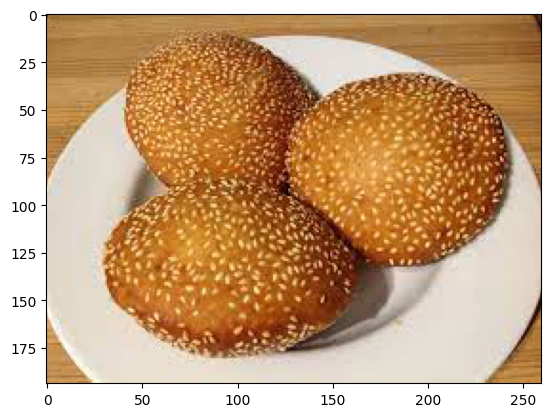

1/1 [==============================] - 0s 18ms/step
banh_khot


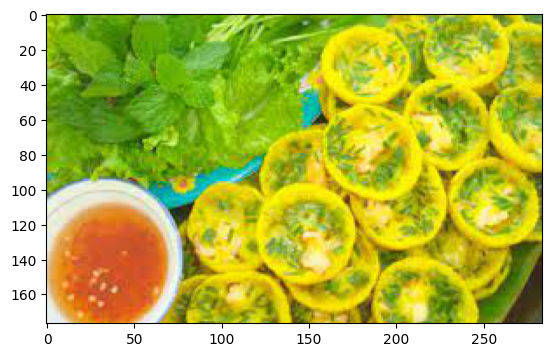

1/1 [==============================] - 0s 21ms/step
banh_da_lon


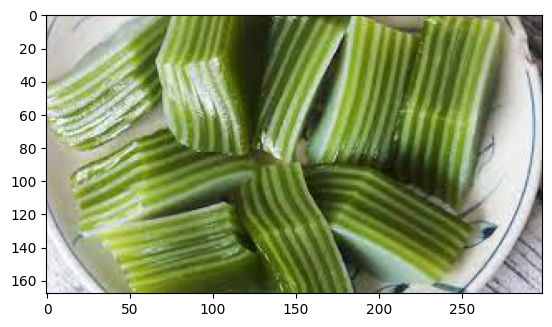

1/1 [==============================] - 0s 18ms/step
banh_bot_loc


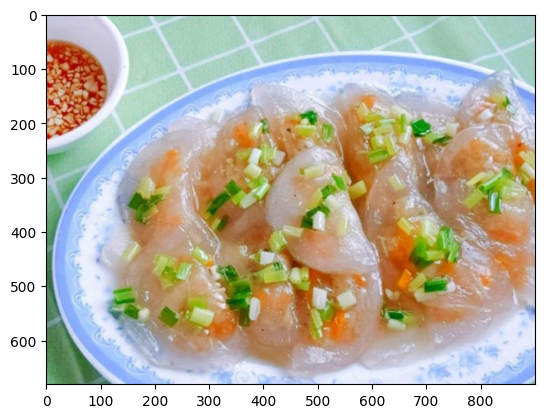

1/1 [==============================] - 0s 22ms/step
banh_xeo


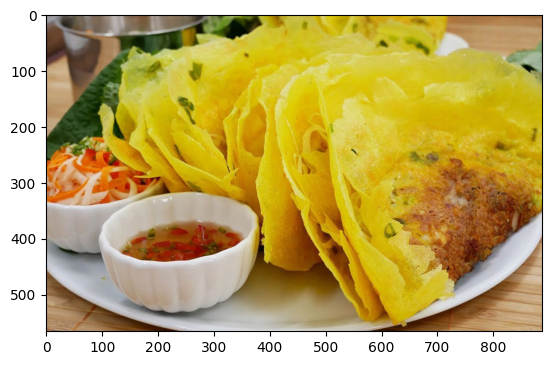

1/1 [==============================] - 0s 19ms/step
BanhMi


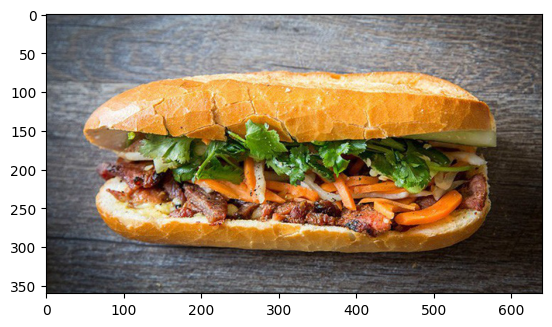

1/1 [==============================] - 0s 22ms/step
banh_bo


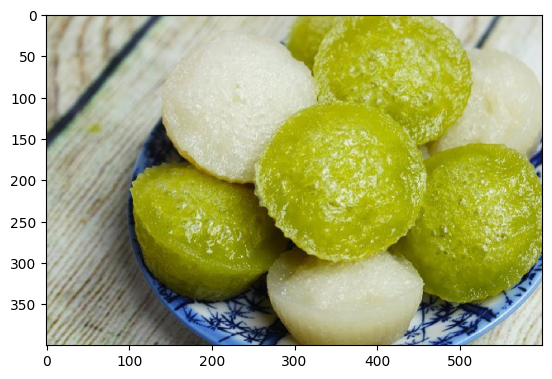

1/1 [==============================] - 0s 25ms/step
banh_tai_heo


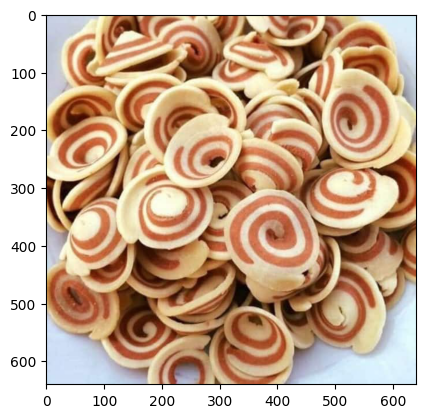

1/1 [==============================] - 0s 20ms/step
banh_trung_thu


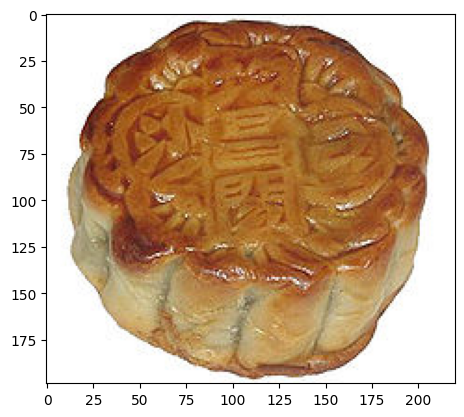

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
folder = '/content/drive/MyDrive/npy_Data/Test_Food/'
for file in listdir(folder):
  photo = load_img(folder  +  file)
  plt.imshow(photo)
  
  photo = load_img(folder +   file, target_size = (40, 40))
  photo=img_to_array(photo)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  class_name=['cat', 'cow', 'dog', 'duck', 'elephant', 'horse', 'monkey', 'rabbit', 'sheep', 'snake']
  print(class_name[result])
  plt.show()

Mounted at /content/drive
